#  Project 2: Harris Corner Detection and Matching

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from utils import plotFigureGray, plotFigure
from student_code import harris_corners, get_keypoints, get_features

## Open Two images for matching. Convert them into grayscale
### Take two similar images and add the photos to folder data. Rename these images as img1.jpg, and img2.jpg

In [10]:
img1_orig = cv2.imread('../data/EIF1.jpeg')
img2_orig = cv2.imread('../data/EIF1Rot.jpeg')



img1= np.float32(cv2.cvtColor(img1_orig,cv2.COLOR_BGR2GRAY))
img2= np.float32(cv2.cvtColor(img2_orig,cv2.COLOR_BGR2GRAY))



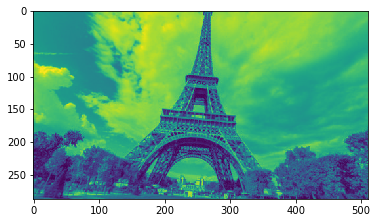

In [11]:
plt.imshow(img2)

# Get Harris Corners, normalize the corner values between 0 and 255. 

In [12]:
corners1, Ix1, Iy1 = harris_corners(img1, window_size=11, alpha=0.04, threshold=1e-3, nms_size=10)
corners2, Ix2, Iy2 = harris_corners(img2, window_size=11, alpha=0.04, threshold=1e-3, nms_size=5)

corners1 = cv2.normalize(corners1, corners1, alpha=0, beta=255,
                       norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
corners2 = cv2.normalize(corners2, corners2, alpha=0, beta=255,
                       norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)




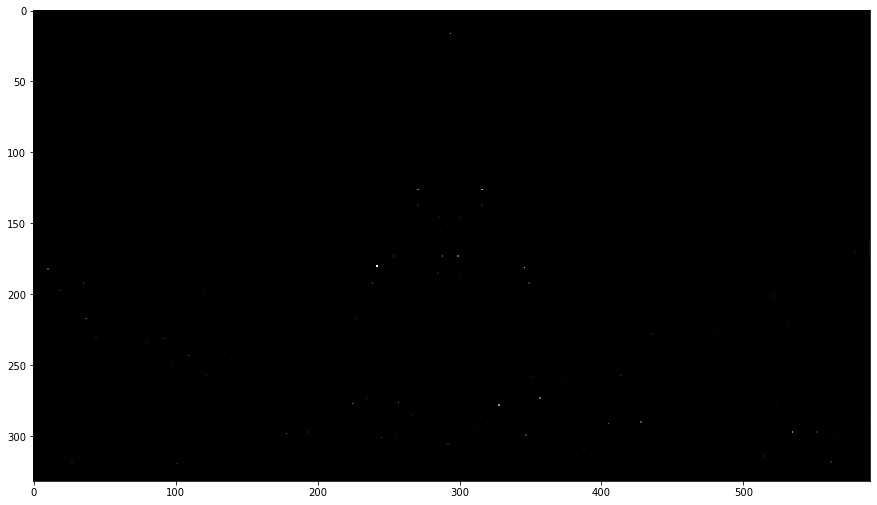

In [13]:
plt.figure(figsize=(15,15))
plt.imshow(corners1,'gray')

# Set the threshold for corners and generate key points from these corners

In [14]:
threshold = 20
kp1 = get_keypoints(corners1, Ix1, Iy1, threshold)
kp2 = get_keypoints(corners2, Ix2, Iy2, threshold)

# Draw the key points. The line (radius) depicts the gradient

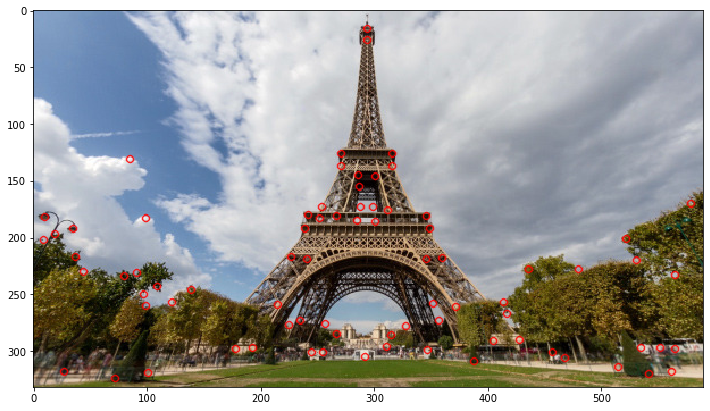

In [15]:
cv2.drawKeypoints(img1_orig, kp1, img1_orig, color=(0,0,255))
                         
plotFigure(img1_orig,12)
plt.show()   

In [16]:
cv2.imwrite('../results/EIF_corner.png',(cv2.drawKeypoints(img1_orig, kp1, img1_orig, color=(0,0,255))))

True

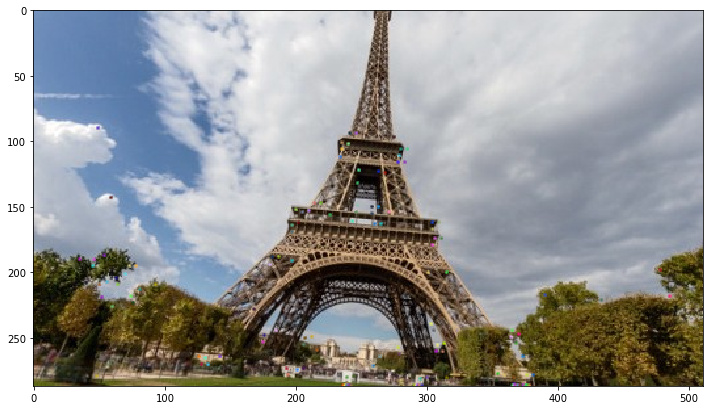

In [17]:
cv2.drawKeypoints(img2_orig, kp2, img2_orig,
                          flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plotFigure(img2_orig,12)
plt.show()   

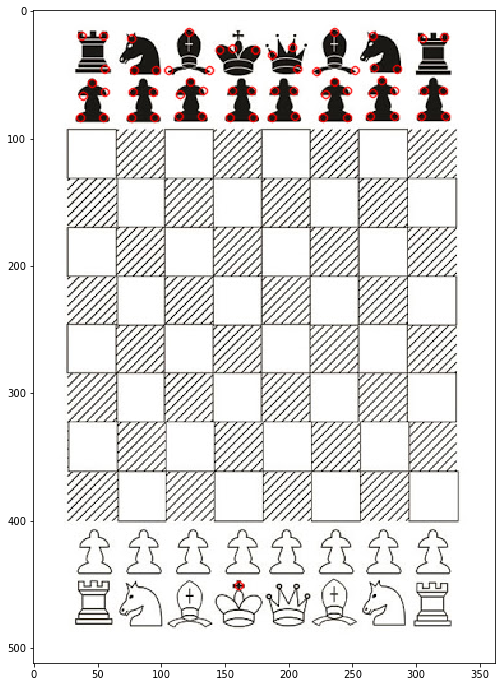

In [22]:
img1_orig = cv2.imread('../data/chess.jpg')




img1= np.float32(cv2.cvtColor(img1_orig,cv2.COLOR_BGR2GRAY))



corners1, Ix1, Iy1 = harris_corners(img1, window_size=11, alpha=0.04, threshold=1e-3, nms_size=10)


corners1 = cv2.normalize(corners1, corners1, alpha=0, beta=255,
                       norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)



threshold = 20
kp1 = get_keypoints(corners1, Ix1, Iy1, threshold)



cv2.drawKeypoints(img1_orig, kp1, img1_orig, color=(0,0,255))
                         
plotFigure(img1_orig,12)
plt.show()   

# From these key points, generate ORB descriptors. Then match these descriptors



In [18]:
orb = cv2.ORB_create()

# create sift instance
# sift = cv2.xfeatures2d.SIFT_create()
# get descriptors
descriptors1 = orb.compute(img1_orig, kp1)[1]
descriptors2 = orb.compute(img2_orig, kp2)[1]




In [19]:
print(descriptors1)

[[ 11 155  37 ...  12 185 157]
 [ 26 132 162 ...  12 189 206]
 [118  69   4 ... 115  80   0]
 ...
 [253 250 209 ... 181 202 237]
 [216  43 218 ... 128  39  43]
 [189  47 218 ... 243 202   8]]


In [20]:

# get matches
bfm = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bfm.match(descriptors1, descriptors2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = np.array([])

img3 = cv2.drawMatches(img1_orig,kp1,img2_orig,kp2,matches[:(len(matches)//2)], img3, flags=2)



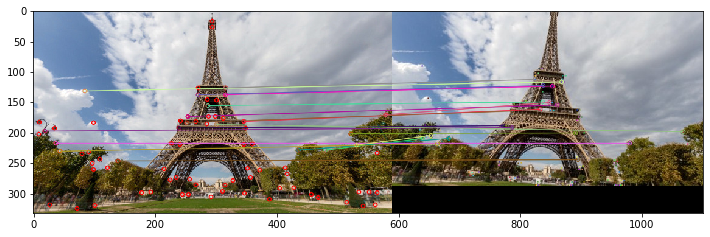

True

In [21]:
plotFigure(img3,12)
plt.show() 
cv2.imwrite('../results/matched_home.png', img3)


In [ ]:
cv2.GaussianBlur(img1,(5,5),30/(2**4))

In [ ]:
def Dog(image,sigma):
  L1=[image]
  L2=[]
  L3=[]
  L4=[]
  L5=[]
  L6=[]
  k=2**(1/4)

  for i in range(1,4):
    L1.append(image/(2**i))
  for j in range(1,4):
    L2.append(cv2.GaussianBlur(L1[j],(5,5),sigma))
    L3.append(cv2.GaussianBlur(L1[j],(5,5),(k)*sigma))
    L4.append(cv2.GaussianBlur(L1[j],(5,5),(k**2)*sigma))
    L5.append(cv2.GaussianBlur(L1[j],(5,5),(k**3)*sigma))
    L6.append(cv2.GaussianBlur(L1[j],(5,5),(k**4)*sigma))

  P1=[]
  P2=[]
  P3=[]
  P4=[]
  P5=[]
  P=[]
  for p in range(0,3):
    P1.append(L2[p]-L1[p])
    P2.append((L3[p]-L2[p]))
    
    P3.append((L4[p]-L3[p]))
    
    P4.append((L5[p]-L4[p]))
    
    P5.append((L6[p]-L5[p]))
  P=[P1,P2,P3,P4,P5]
  return P

In [ ]:
Dog(img2,30)[3][2]

In [ ]:
plt.figure(figsize=(12,12))
for a in range(3):
  plt.subplot('13'+str(a))
  plt.imshow(Dog(img2,30)[3][a],'gray')

In [ ]:
point1=[]
for i in range(len(kp1)):
  point1.append(kp1[i].pt)

In [ ]:
[x.pt for x in kp1]

In [ ]:
# for i,j in point1:

#   theta = np.arctan(Iy[i,j]/Ix[i,j])
#   mag=((Iy[i,j]**2)+())

## Custom SIFT descriptor

In [ ]:
import math

In [ ]:
descriptors1 = get_features(img1, kp1, 16)
descriptors2 = get_features(img2, kp2, 16)
print(descriptors1)
print(descriptors2)

In [ ]:
descriptors1 = np.float32(descriptors1)
descriptors2 = np.float32(descriptors2)

# get matches
bfm = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bfm.match(descriptors1, descriptors2)
matches = sorted(matches, key = lambda x:x.distance)
print(len(matches))
img3 = np.array([])

img3 = cv2.drawMatches(img1_orig,kp1,img2_orig,kp2,matches[:len(matches)//2], img3, flags=2)





In [ ]:
plotFigure(img3,12)
plt.show() 
cv2.imwrite('../results/matched_SIFT_home.png', img3)
